In [1]:
from datetime import date 
today = date.today()
print("Today's date:", today)

Today's date: 2020-02-27


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import os
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#print(os.listdir("data/data1/"))

['test.zip', 'train.zip']


In [4]:
train = "data/data1/train.zip"
test = 'data/data1/test.zip'

train = pd.read_csv(train)
test = pd.read_csv(test)

In [5]:
train.isna().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [6]:
print('Percent of missing "Gender" records is %.2f%%' %((train['gender'].isnull().sum()/train.shape[0])*100))

Percent of missing "Gender" records is 2.69%


In [7]:
test.isna().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        249
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
dtype: int64

In [8]:
print('Percent of missing "Gender" records is %.2f%%' %((test['gender'].isnull().sum()/len(test))*100))

Percent of missing "Gender" records is 2.49%


In [11]:
train[train.isnull().any(axis=1)].head(10)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
15,32,0.003519,Android,NaN,0,71909,1,3,8,0
38,54,0.005529,iPhone,NaN,0,87122,2,3,8,0
91,35,0.005510,iPhone,NaN,0,52343,1,3,3,0
113,41,0.004282,Android,NaN,0,72978,2,2,11,0
122,34,0.005518,iPhone,NaN,0,50425,2,3,3,0
161,30,0.003810,laptop,NaN,1,64773,1,1,1,0
163,54,0.005794,iPhone,NaN,0,84405,1,3,15,0
189,48,0.003734,desktop,NaN,0,72464,2,2,12,0
190,17,0.005405,iPhone,NaN,1,55135,2,1,0,0
199,18,0.003851,Android,NaN,1,22917,2,3,0,0


In [12]:
test[test.isnull().any(axis=1)].head(10)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
69,30,0.003440,desktop,NaN,0,68949,1,2,2
78,31,0.003442,other,NaN,0,35738,2,2,5
81,44,0.003662,desktop,NaN,0,71453,1,3,5
109,22,0.003578,Android,NaN,0,25662,2,3,3
222,22,0.003304,Android,NaN,1,51174,1,1,2
277,58,0.004315,laptop,NaN,1,67637,2,3,1
294,23,0.003803,desktop,NaN,1,46932,1,2,3
318,33,0.003681,desktop,NaN,1,67986,2,3,6
325,49,0.004353,desktop,NaN,0,79820,1,2,13
335,24,0.004162,other,NaN,0,34999,2,3,4


It seems bit impossible to impute the missing values for gender with given data. Having said that I will simply drop the missing values bot both test and train. 

Let's clean up the missing values first!

In [13]:
train['type'] = 'train' # leave mark for splitting later
test['type'] = 'test'
dat = pd.concat([train,test], axis = 0, sort = False)

In [14]:
dat.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome,type
0,56,0.005737,iPhone,M,0,62717,2,1,4,0.0,train
1,50,0.004733,desktop,F,0,64328,2,3,2,0.0,train
2,54,0.004129,laptop,M,0,83439,1,3,7,0.0,train
3,16,0.005117,Android,F,0,30110,2,3,0,0.0,train
4,37,0.003635,desktop,M,0,76565,2,1,5,0.0,train


the maximum row of the chart that our data varies in distribution; this will be important as we consider classification models. Standardization is an important requirement for many classification models that should be handled when implementing pre-processing.

In [15]:
def calculate_perc(data_frame, col):
    col_vals = data_frame[col].value_counts().reset_index()

    # If the number of unique instances in column exceeds 20 print warning
    if len(col_vals['index']) > 20:
        print('Warning: values in column are more than 20 \nPlease try a column with lower value counts!')
    # Else it calculates/prints percentage for each unique value in column
    else:
        # Create a function to output the percentage
        f = lambda x, y: 100 * (x / sum(y))
        for i in range(0, len(col_vals['index'])):
            print('{0} accounts for {1:.2f}% of the {2} column'\
                .format(col_vals['index'][i],
                        f(col_vals[col].iloc[i],
                        col_vals[col]),
                        col))

In [16]:
calculate_perc(dat, 'outcome')

0.0 accounts for 90.18% of the outcome column
1.0 accounts for 9.82% of the outcome column


In [17]:
dat = dat.dropna(subset = ['gender'])

In [18]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19482 entries, 0 to 9999
Data columns (total 11 columns):
age                           19482 non-null int64
cost_of_ad                    19482 non-null float64
device_type                   19482 non-null object
gender                        19482 non-null object
in_initial_launch_location    19482 non-null int64
income                        19482 non-null int64
n_drivers                     19482 non-null int64
n_vehicles                    19482 non-null int64
prior_ins_tenure              19482 non-null int64
outcome                       9731 non-null float64
type                          19482 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 1.8+ MB


device_type and gender should be categorical, instead of obj. Let's fix them

In [19]:
category_columns = ["device_type","gender"]

for col in category_columns:
    dat[col] = dat[col].astype('category')
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19482 entries, 0 to 9999
Data columns (total 11 columns):
age                           19482 non-null int64
cost_of_ad                    19482 non-null float64
device_type                   19482 non-null category
gender                        19482 non-null category
in_initial_launch_location    19482 non-null int64
income                        19482 non-null int64
n_drivers                     19482 non-null int64
n_vehicles                    19482 non-null int64
prior_ins_tenure              19482 non-null int64
outcome                       9731 non-null float64
type                          19482 non-null object
dtypes: category(2), float64(2), int64(6), object(1)
memory usage: 1.5+ MB


Splitting back to the train and test set

In [20]:
train=dat[dat['type']=='train']
test=dat[dat['type']=='test']

In [21]:
# dropping the type column which no longer needed. Also, drop the outcome column from test set 
train = train.drop(['type'], axis = 1)
test = test.drop(['type','outcome'], axis = 1)

In [22]:
train.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0.0
1,50,0.004733,desktop,F,0,64328,2,3,2,0.0
2,54,0.004129,laptop,M,0,83439,1,3,7,0.0
3,16,0.005117,Android,F,0,30110,2,3,0,0.0
4,37,0.003635,desktop,M,0,76565,2,1,5,0.0


In [23]:
test.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


Note: there is no target variable into test data (i.e. "outcome" column is missing), so the goal is to predict this target using different machine learning algorithms such as logistic regression. 

In [24]:
print('The number of observation in the train data is {}.'.format(train.shape[0]))
print('The number of observation in the test data is {}.'.format(test.shape[0]))

The number of observation in the train data is 9731.
The number of observation in the test data is 9751.


Note: due to the missing values, now the number of train set is smaller than that of test set.

### Data Cleaning & EDA

In [25]:
print(train.device_type.unique())
train.device_type.value_counts()

[iPhone, desktop, laptop, Android, other]
Categories (5, object): [iPhone, desktop, laptop, Android, other]


desktop    1988
Android    1980
other      1936
laptop     1922
iPhone     1905
Name: device_type, dtype: int64

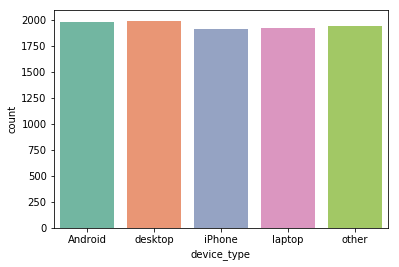

In [26]:
sns.countplot(x='device_type', data=train, palette='Set2')
#plt.show()

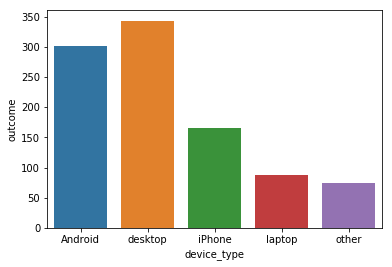

In [27]:
sns.barplot(x = 'device_type', y = 'outcome', data = train.groupby('device_type')['outcome'].sum().reset_index().sort_values(by = 'outcome', ascending = False))

even though the number of device types are pretty much the same, each type has differnt impact on the outcome

[Text(0.5, 0, 'Age')]

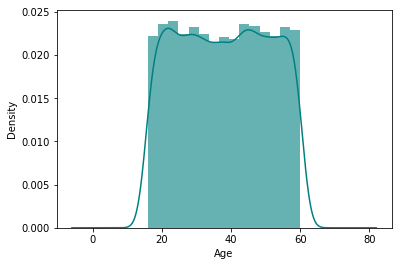

In [28]:
ax = train["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
# plt.xlim(-10,85)


"Age" shows uniform distribution. It is not ideal still not a big problem.

In [29]:
# mean age
print('The mean of "Age" is %.2f' %(train["age"].mean(skipna=True))) #skipna is not needed
# median age
print('The median of "Age" is %.2f' %(train["age"].median(skipna=True)))

The mean of "Age" is 37.98
The median of "Age" is 38.00


The number of each gender:
F    4970
M    4761
Name: gender, dtype: int64


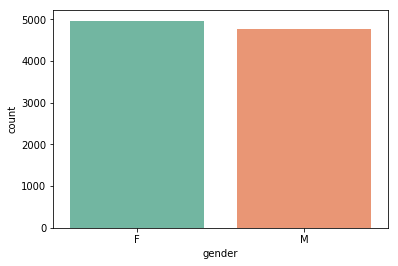

In [30]:
print('The number of each gender:')
print(train['gender'].value_counts())
sns.countplot(x='gender', data=train, palette='Set2')

Take a look at the age for each gender and device_type

In [31]:
var = ['gender', 'device_type']

for i in var:
    print(pd.pivot_table(train, values = ['age'], index = i, aggfunc = np.mean))

              age
gender           
F       38.051308
M       37.903382
                   age
device_type           
Android      38.413131
desktop      37.586016
iPhone       37.517585
laptop       38.435484
other        37.939050


In [32]:
#create categorical variables 
final_train = pd.get_dummies(train, columns =["gender","device_type"])
final_test = pd.get_dummies(test, columns =["gender","device_type"])

In [33]:
final_train.head()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome,gender_F,gender_M,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other
0,56,0.005737,0,62717,2,1,4,0.0,0,1,0,0,1,0,0
1,50,0.004733,0,64328,2,3,2,0.0,1,0,0,1,0,0,0
2,54,0.004129,0,83439,1,3,7,0.0,0,1,0,0,0,1,0
3,16,0.005117,0,30110,2,3,0,0.0,1,0,1,0,0,0,0
4,37,0.003635,0,76565,2,1,5,0.0,0,1,0,1,0,0,0


[Text(0.5, 17.200000000000003, 'Age')]

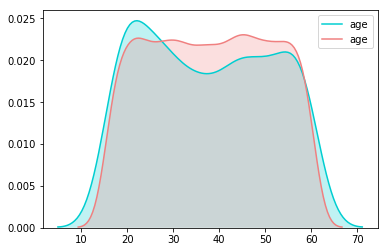

In [34]:
p1 = sns.kdeplot(final_train["age"][final_train.outcome == 1], color="darkturquoise", shade=True)
p2 = sns.kdeplot(final_train["age"][final_train.outcome == 0], color="lightcoral", shade=True)
ax.set(xlabel='Age')


In [35]:
final_train[["age", "outcome"]].groupby(['outcome'], as_index=False).mean()

,outcome,age
0,0.0,38.036310
1,1.0,37.462487


now it is ready to run the regression! 

###  Logistic Regression and Results

##### Feature selection:

###### Recursive feature elimination:
Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

Before the feature selections, there are 15 columns, including dummies for categorical variables

In [38]:
len(final_train.columns)

15

In [39]:
X = final_train.drop(['outcome'], axis = 1)
y = final_train['outcome']

model = LogisticRegression()

rfe = RFE(model, 8)
rfe = rfe.fit(X, y)

print('Selected features:\n %s' % list(X.columns[rfe.support_]))

Selected features:
 ['in_initial_launch_location', 'n_drivers', 'n_vehicles', 'gender_F', 'device_type_Android', 'device_type_desktop', 'device_type_laptop', 'device_type_other']


###### Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.


Optimal number of features: 6
Selected features: ['in_initial_launch_location', 'n_drivers', 'n_vehicles', 'gender_F', 'device_type_laptop', 'device_type_other']


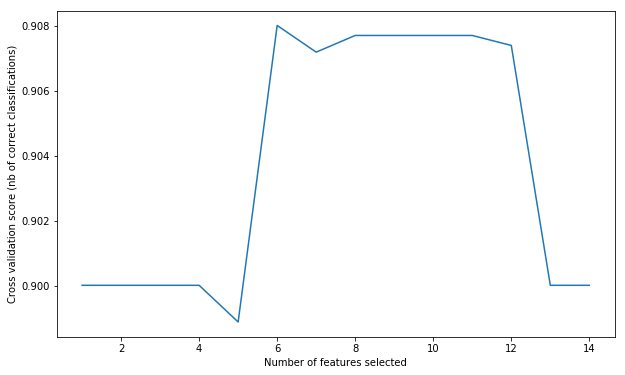

In [40]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

According to the RFECV, 6 variables are impactful, instead of 8. 

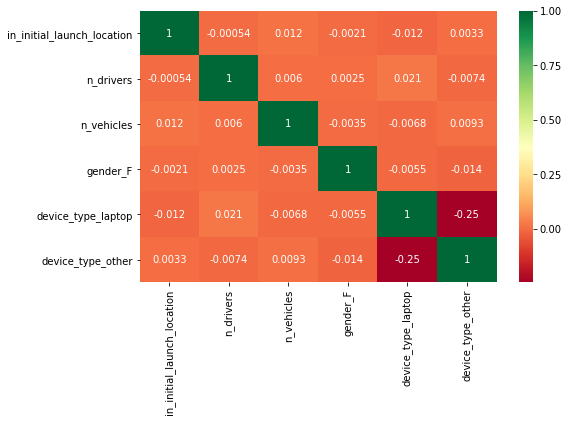

In [41]:
Selected_features = ['in_initial_launch_location', 'n_drivers', 'n_vehicles', 'gender_F', 'device_type_laptop', 'device_type_other']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

###### Review of model evaluation procedures

Motivation: Need a way to choose between machine learning models

    Goal is to estimate likely performance of a model on out-of-sample data

Initial idea: Train and test on the same data

    But, maximizing training accuracy rewards overly complex models which overfit the training data

Alternative idea: Train/test split

    Split the dataset into two pieces, so that the model can be trained and tested on different data
    Testing accuracy is a better estimate than training accuracy of out-of-sample performance
    Problem with train/test split
        It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
        Testing accuracy can change a lot depending on a which observation happen to be in the testing set


###### Model evaluation based on simple train/test split using train_test_split() function

Train/Test split results:
LogisticRegression accuracy is 0.913
LogisticRegression log_loss is 0.266
LogisticRegression auc is 0.789


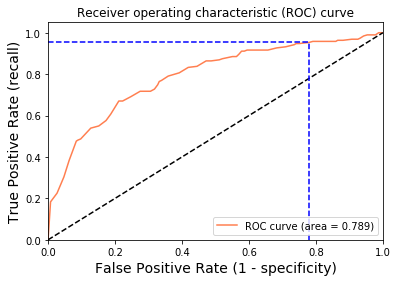

Using a threshold of 0.019 guarantees a sensitivity of 0.953 and a specificity of 0.221, i.e. a false positive rate of 77.90%.


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['outcome']

# use train/test split with different random_state values
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Still, not passing the min AUC score .825. Try K-fold cv

In [43]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.908
LogisticRegression average log_loss is 0.266
LogisticRegression average auc is 0.800


In [45]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

logregCV = LogisticRegression()

results = cross_validate(logregCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(logregCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.908 (+/-0.004)
LogisticRegression average log_loss: 0.266 (+/-0.006)
LogisticRegression average auc: 0.800 (+/-0.012)


In [46]:
print("Followings are the final feateures in train set:\n", final_train.columns)

Followings are the final feateures in train set:
 Index(['age', 'cost_of_ad', 'in_initial_launch_location', 'income',
       'n_drivers', 'n_vehicles', 'prior_ins_tenure', 'outcome', 'gender_F',
       'gender_M', 'device_type_Android', 'device_type_desktop',
       'device_type_iPhone', 'device_type_laptop', 'device_type_other'],
      dtype='object')


In [47]:
print("Followings are the selected feateures:\n", Selected_features)

Followings are the selected feateures:
 ['in_initial_launch_location', 'n_drivers', 'n_vehicles', 'gender_F', 'device_type_laptop', 'device_type_other']


What if I incorporate Gender M and other devices?

In [55]:
cols = Selected_features + ['gender_M', 'device_type_Android', 'device_type_desktop', 'device_type_iPhone']
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

logregCV2 = LogisticRegression()

results = cross_validate(logregCV2, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results with more features:')
for sc in range(len(scoring)):
    print(logregCV2.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results with more features:
LogisticRegression average accuracy: 0.908 (+/-0.004)
LogisticRegression average log_loss: 0.261 (+/-0.006)
LogisticRegression average auc: 0.809 (+/-0.011)


not much but there is still an improvement in the AUC. 

Let's take a look at the correlation again and incorporate more variables! see how it goes

In [49]:
def CorrMtx(df, size, dropDuplicates = True):
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(size[0], size[1]))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

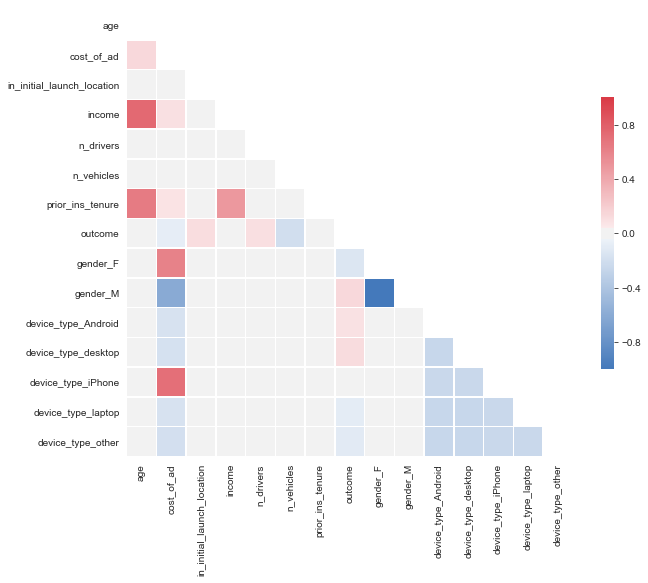

In [50]:
CorrMtx(df= final_train, size = [10,10])

In [152]:
print("the 6 selected variables are : ", Selected_features)
print("the modified variables are: ", cols)

the 6 selected variables are :  ['in_initial_launch_location', 'n_drivers', 'n_vehicles', 'gender_F', 'device_type_laptop', 'device_type_other']
the modified variables are:  ['in_initial_launch_location', 'n_drivers', 'n_vehicles', 'gender_F', 'device_type_laptop', 'device_type_other', 'gender_M', 'device_type_Android', 'device_type_desktop', 'device_type_iPhone', 'age', 'cost_of_ad', 'prior_ins_tenure']


I pretty much used all variables except income, resulting in slight improvement in AUC. However, still not meet the min qualification, 0.825....

###### GridSearchCV evaluating using multiple scorers simultaneously

best params: LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.10001}
best score: 0.907717603535094


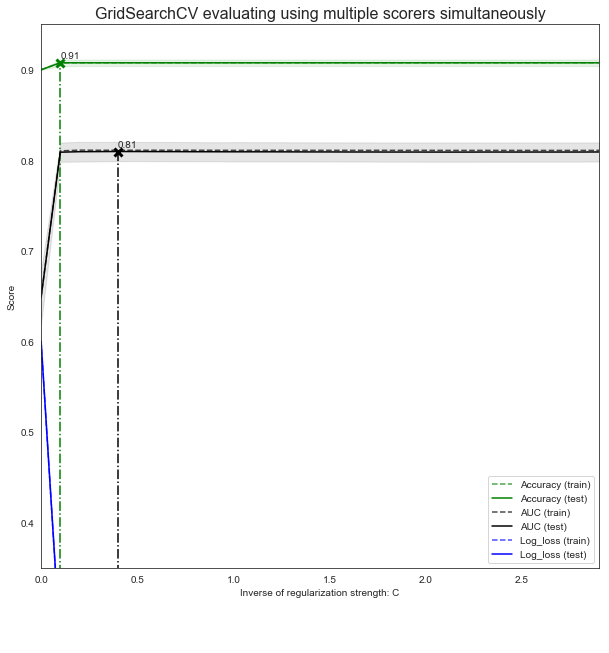

In [51]:
from sklearn.model_selection import GridSearchCV

X = final_train[cols]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously

I can applied many tasks together for more in-depth evaluation like gridsearch using cross-validation based on k-folds repeated many times, that can be scaled or no with respect to many scorers and tunning on parameter for a given estimator!

best params: Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=False, with_std=False)), ('clf', LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
best params: {'clf__C': 0.10001}
best score: 0.907717603535094


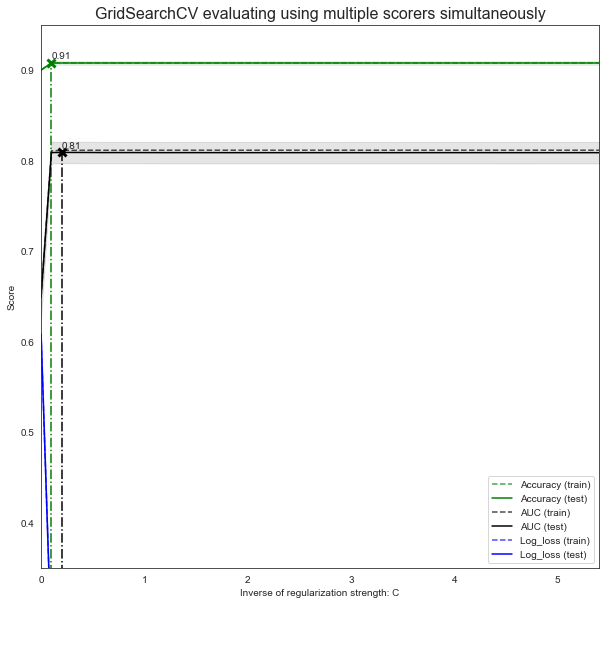

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [62]:
from sklearn.ensemble import RandomForestClassifier 


In [63]:
rf = RandomForestClassifier()

Even tough it was a slight improvement in AUC, still adding more variables except for income, it is worth to go with those features than just 6. 

In [59]:
X = final_train[cols]
y = final_train['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

####  Simple RF model:

In [64]:
import time
toc = time.time()

param_dist = {'max_depth': [2, 3, 4, 5],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rf, 
                     cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
tic = time.time()
print('Time taken in grid search: {0: .2f}'.format(tic - toc))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None}
Time taken in grid search:  5.39


In [169]:
rf.set_params(criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=217, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

### Out of Bag Error Rate (OOB)
Utilizing the OOB error rate that was created with the model gives us an unbiased error rate. Since OOB can be calculated with the model estimation, it's helpful when cross validating and/or optimizing hyperparameters prove to be too computationally expensive.

In [170]:
toc = time.time()
rf.set_params(warm_start=False, 
              oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

tic = time.time()
print('Time taken in oob : {0: .2f}'.format(tic - toc))

Time taken in oob :  922.55


In [172]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

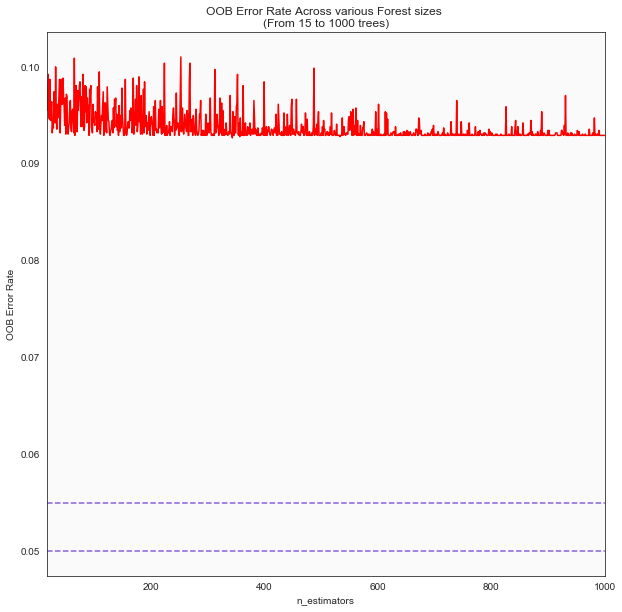

In [173]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.055, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [174]:
print('OOB Error rate for 600 trees is: {0:.5f}'.format(oob_series[600]))

OOB Error rate for 600 trees is: 0.09288


In [181]:
def variable_importance(fit):
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

def print_var_importance(importance, indices, name_index):
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))
        
def variable_importance_plot(importance, indices, name_index):
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    #ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \n Outcome ')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

In [184]:
var_imp_rf = variable_importance(rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']
names_index = X_train.columns

In [185]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'n_vehicles' has a Mean Decrease in Impurity of 0.36637
2. The feature 'gender_F' has a Mean Decrease in Impurity of 0.18898
3. The feature 'in_initial_launch_location' has a Mean Decrease in Impurity of 0.12940
4. The feature 'device_type_laptop' has a Mean Decrease in Impurity of 0.11371
5. The feature 'device_type_other' has a Mean Decrease in Impurity of 0.10485
6. The feature 'n_drivers' has a Mean Decrease in Impurity of 0.09669


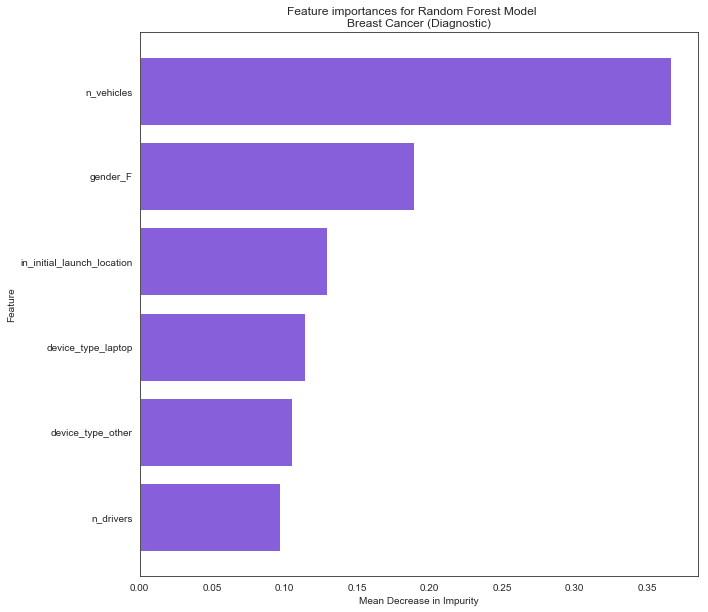

In [186]:
variable_importance_plot(importances_rf, indices_rf, names_index)

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)


print(rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

RandomForestClassifier accuracy is 0.908
RandomForestClassifier log_loss is 0.340
RandomForestClassifier auc is 0.826


Cross Validation:

In [68]:
from sklearn.model_selection import KFold, cross_val_score

In [66]:
def cross_val_metrics(fit, X_train, y_train, estimator, print_results = True):
    
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    n = KFold(n_splits=10)
    scores = cross_val_score(fit, 
                         X_train, 
                         y_train, 
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2

In [69]:
cross_val_metrics(rf, 
                  X_train, 
                  y_train, 
                  'rf',
                  print_results = True)

Cross validation run 0:  0.906
Cross validation run 1:  0.899
Cross validation run 2:  0.897
Cross validation run 3:  0.899
Cross validation run 4:  0.884
Cross validation run 5:  0.904
Cross validation run 6:  0.916
Cross validation run 7:  0.910
Cross validation run 8:  0.919
Cross validation run 9:  0.906
Accuracy:  0.904 (+/-  0.005)


applying to test data

In [ ]:
X= final_train.drop(['outcome'], axis = 1)
y= final_train['outcome']
rf.fit(X,y)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)


print(rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))